In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
data = pd.read_csv('C:/Users/chn03/Desktop/Python lessons/health_project/data/data.csv')
print(data.head())
print(data.info())


   id  age sex  height  weight  systolic_bp  cholesterol smoker  disease
0   1   57   F   168.9    65.8        141.8         4.58     No        0
1   2   47   M   180.4    95.9        144.8         5.18    Yes        0
2   3   59   F   169.9    82.2        151.7         6.16     No        0
3   4   72   M   157.7    93.1        151.0         6.63     No        0
4   5   46   M   192.6   104.1        144.1         5.21     No        0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           800 non-null    int64  
 1   age          800 non-null    int64  
 2   sex          800 non-null    object 
 3   height       800 non-null    float64
 4   weight       800 non-null    float64
 5   systolic_bp  800 non-null    float64
 6   cholesterol  800 non-null    float64
 7   smoker       800 non-null    object 
 8   disease      800 non-null    int6

        id    age    sex  height  weight  systolic_bp  cholesterol  smoker  \
0    False  False  False   False   False        False        False   False   
1    False  False  False   False   False        False        False   False   
2    False  False  False   False   False        False        False   False   
3    False  False  False   False   False        False        False   False   
4    False  False  False   False   False        False        False   False   
..     ...    ...    ...     ...     ...          ...          ...     ...   
795  False  False  False   False   False        False        False   False   
796  False  False  False   False   False        False        False   False   
797  False  False  False   False   False        False        False   False   
798  False  False  False   False   False        False        False   False   
799  False  False  False   False   False        False        False   False   

     disease  
0      False  
1      False  
2      False  
3  

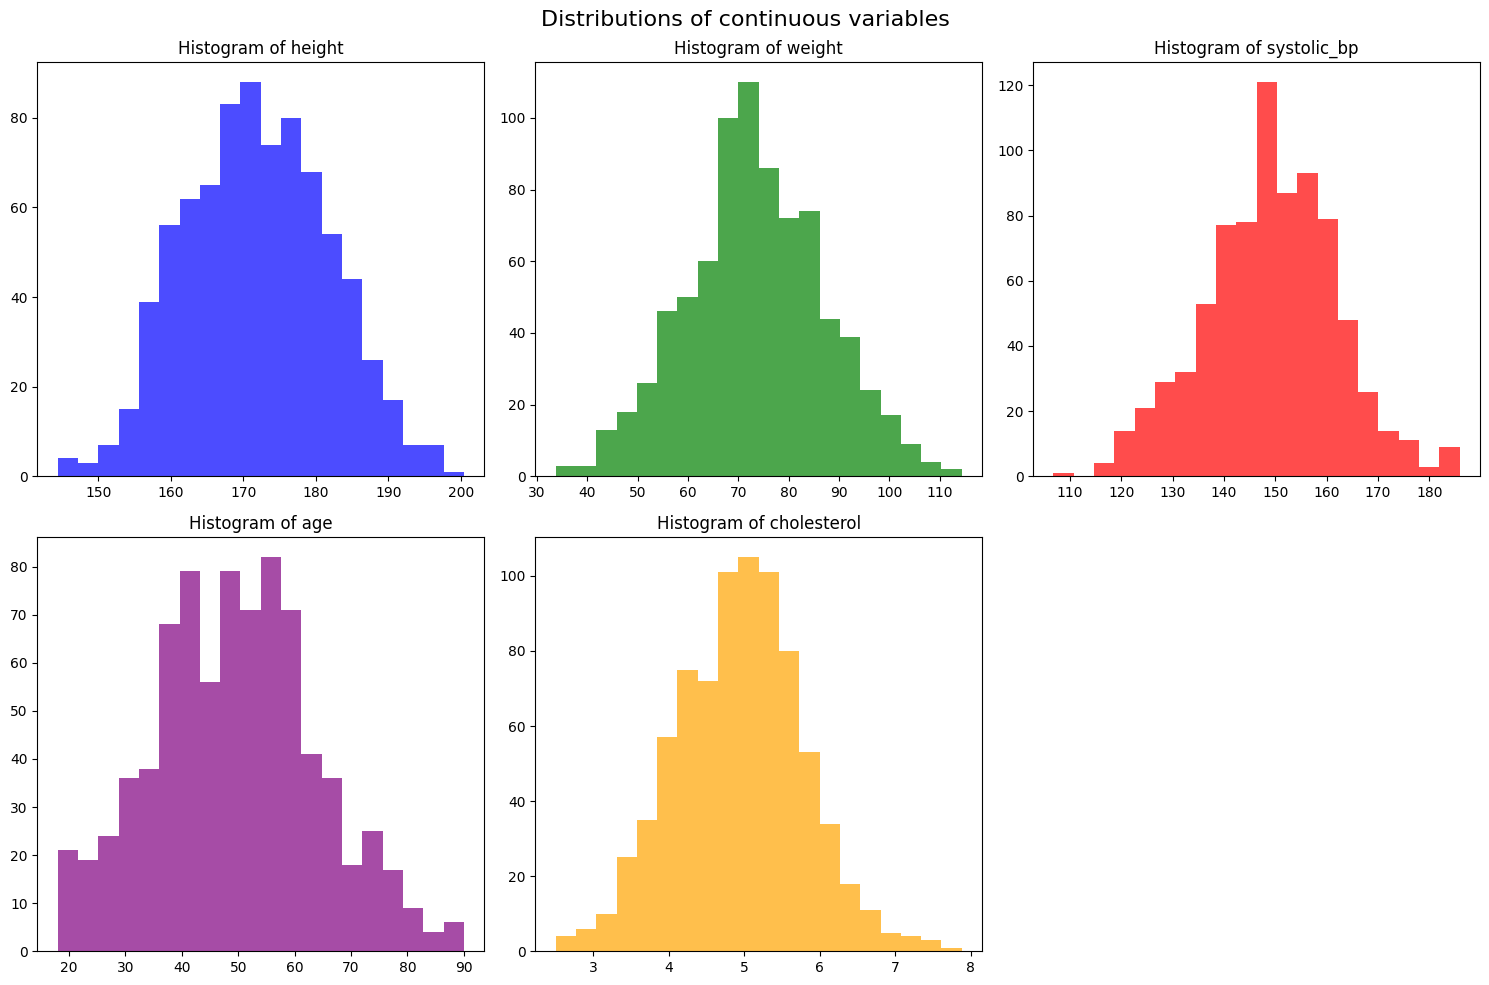

ValueError: could not convert string to float: 'F'

In [ ]:
print(data.isna())
print(data.isna().any())
print(data.isna().sum())
print(data.columns)
# visualise the data to find patterns
fig, axes = plt.subplots(2,3, figsize=(15,10))

axes[0,0].hist(data['height'], bins=20, color='blue', alpha=0.7)
axes[0,0].set_title('Histogram of height')
axes[0,1].hist(data['weight'], bins=20, color='green', alpha=0.7)
axes[0,1].set_title('Histogram of weight')
axes[0,2].hist(data['systolic_bp'], bins=20, color='red', alpha=0.7)
axes[0,2].set_title('Histogram of systolic_bp')
axes[1,0].hist(data['age'], bins=20, color='purple', alpha=0.7)
axes[1,0].set_title('Histogram of age')
axes[1,1].hist(data['cholesterol'], bins=20, color='orange', alpha=0.7)
axes[1,1].set_title('Histogram of cholesterol')
axes[1,2].axis('off') 
fig.suptitle('Distributions of continuous variables', fontsize=16)
plt.tight_layout()

plt.show()



In [7]:

print(data['disease'].value_counts())
print(data['smoker'].value_counts())
data['disease'] = data['disease'].astype('category')
data['smoker'] = data['smoker'].astype('category')


#figure, axes = plt.subplots(1,1, figsize=(12,8), squeeze=False)
#axes[0,0].bar(data['smoker'], data['smoker'].value_counts().index, color=['cyan', 'magenta'])
#axes[0,0].set_title('Bar chart of smoking_status')   

disease
0    753
1     47
Name: count, dtype: int64
smoker
No     587
Yes    213
Name: count, dtype: int64


Text(0, 0.5, 'Weight')

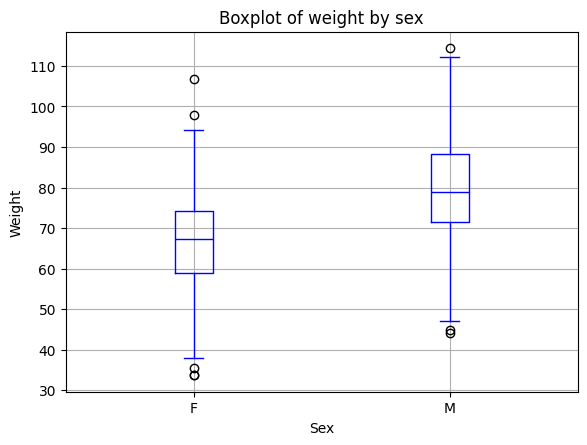

In [ ]:
data.boxplot(column='weight', by='sex', color = 'blue', grid=True)
plt.title('Boxplot of weight by sex')
plt.suptitle('')  
plt.xlabel('Sex')
plt.ylabel('Weight')
plt.show()

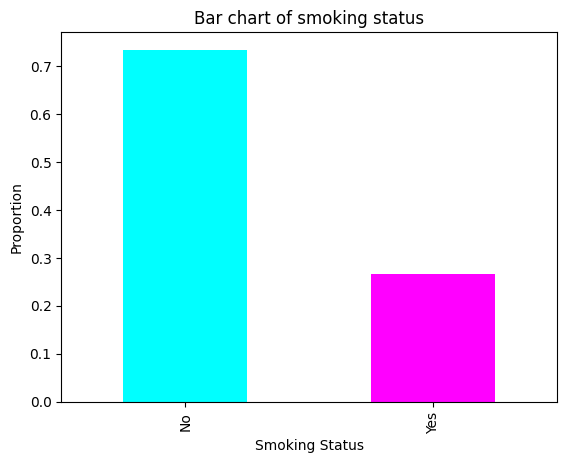

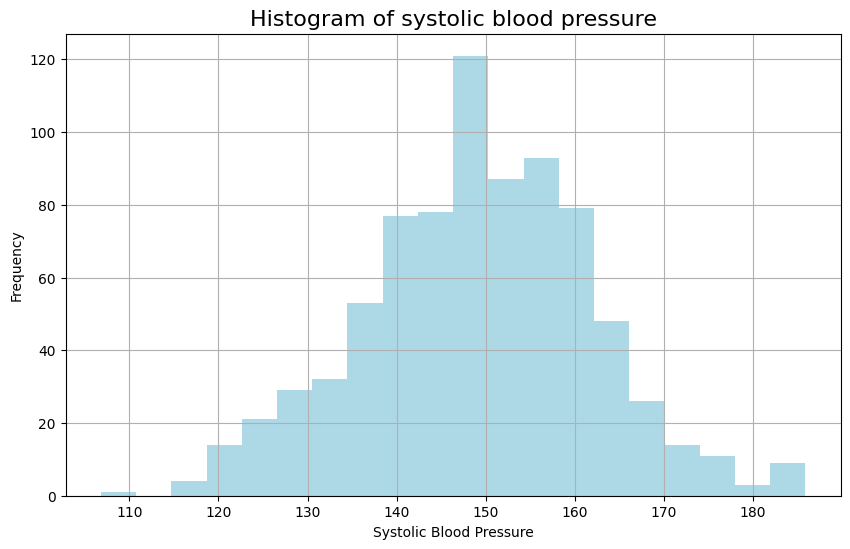

In [ ]:
data['smoker'].value_counts(normalize=True).plot(kind='bar', color=['cyan', 'magenta'])
plt.title('Bar chart of smoking status')  
plt.xlabel('Smoking Status')
plt.ylabel('Proportion')    
plt.show()

data.hist(column='systolic_bp', bins=20, figsize=(10,6), color=['lightblue'])
plt.title('Histogram of systolic blood pressure', fontsize=16) 
plt.suptitle('')  
plt.xlabel('Systolic Blood Pressure')                                  
plt.ylabel('Frequency')
plt.show()

In [13]:
# hypothesus test for difference in systolic blood pressure between smokers and non-smokers
smokers_bp = data[data['smoker'] == 'Yes']['systolic_bp']
nonsmokers_bp = data[data['smoker'] == 'No']['systolic_bp']    
t_stat, p_value = stats.ttest_ind(smokers_bp, nonsmokers_bp, equal_var=True)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

print(data['smoker'].value_counts())

T-statistic: 0.4609102005307389, P-value: 0.6449886190967198
smoker
No     587
Yes    213
Name: count, dtype: int64


The p-value of the t-test for the difference in mean systolic blood pressure between smokers and non-smokers is 0.644. There is not enough evidence to suggest a difference in mean systolic blood pressure between smokers and non smokers. 